# Практика

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [4]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
from scipy.stats import pareto
b = 2.6
pareto_rv = sts.norm(b)
sample = pareto_rv.rvs(20)
sample

array([1.43726   , 2.24438302, 2.32082272, 3.14101228, 2.8961251 ,
       2.89086048, 4.44485776, 2.70555804, 0.54570298, 1.88051223,
       3.91036322, 2.95407759, 3.18282035, 4.10125091, 3.38482294,
       2.93030063, 3.49397489, 2.41127464, 2.56330414, 2.84753771])

### Постройте гистограмму выборки и теоретическую плотность распределения

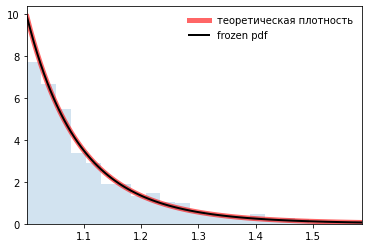

In [5]:
# ваш код тут
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
fig, ax = plt.subplots(1, 1)
b = 10
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='теоретическая плотность')
rv = pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))
r = pareto.rvs(b, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

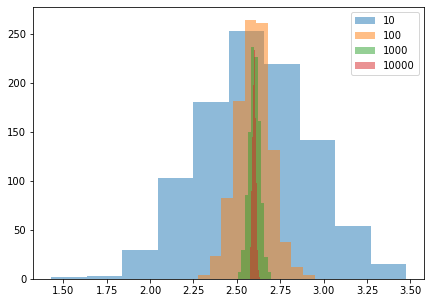

In [6]:
# ваш код тут
plt.figure(figsize=(7,5))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(pareto_rv.rvs(N)))
    #plt.hist(means, alpha=0.5)
    plt.hist(means, density=False, alpha=0.5)
plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [7]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(pareto_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [8]:
print(pareto_rv.mean())
print (pareto_rv.var())
print(pareto_rv.std())


2.6
1.0
1.0


[]

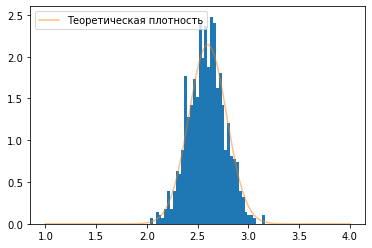

In [9]:
norm_rv = sts.norm(loc=pareto_rv.mean(), scale=pareto_rv.std() / np.sqrt(N-1))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

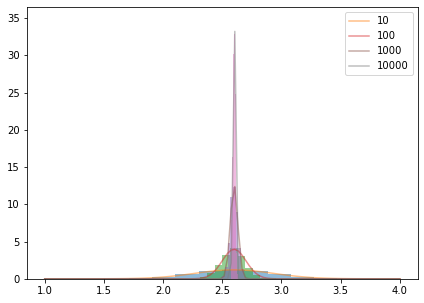

In [10]:
# ваш код тут
plt.figure(figsize=(7,5))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(pareto_rv.rvs(N)))
    norm_rv = sts.norm(loc=pareto_rv.mean(), scale=pareto_rv.std() / np.sqrt(N-1))
    plt.hist(means, density=True, alpha=0.5)
    x = np.linspace(1,4, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
    
plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [11]:
# Хорошо на большом количесве выборок. апроксимация среднего соответсвуент нормальному распредилению

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [65]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [66]:
# ваш код тут
df_tdc_churn_f = df['total day calls'].loc[df['churn']== False].reset_index()
df_tdc_churn_t = df['total day calls'].loc[df['churn']== True].reset_index()

In [70]:
tdc_churn_f_mean = df_tdc_churn_f['total day calls'].mean()

In [71]:
tdc_churn_t_mean = df_tdc_churn_f['total day calls'].mean()

In [72]:
df_tdc_churn_f['total day calls'].std( ddof=1 )

19.801156951805503

In [73]:
df_tdc_churn_t['total day calls'].std(ddof=1)

21.58230721307551

In [86]:
len(df_tdc_churn_f['total day calls'])

2850

In [87]:
len(df_tdc_churn_t['total day calls'])

483

In [90]:
k = 1.96 * df_tdc_churn_f['total day calls'].std( ddof=1 ) / math.sqrt(len(df_tdc_churn_f['total day calls']))
print(tdc_churn_f_mean - k)
print(tdc_churn_f_mean + k)

99.55617497470149
101.0101408147722


In [91]:
k = 1.96 * df_tdc_churn_t['total day calls'].std( ddof=1 ) / math.sqrt(len(df_tdc_churn_t['total day calls']))
print(tdc_churn_t_mean - k)
print(tdc_churn_t_mean + k)

98.3583810909241
102.2079346985496


In [74]:
print ("sgd model mean auc 95%% confidence interval", _zconfint_generic(tdc_churn_f_mean, 
                                                                  math.sqrt(0.25/len(df_tdc_churn_f['total day calls'])), 
                                                                  0.05, 'two-sided'))

print ("ridge model mean auc 95%% confidence interval", _zconfint_generic(tdc_churn_t_mean, 
                                                                    math.sqrt(0.25/len(df_tdc_churn_t['total day calls'])), 
                                                                    0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (100.26480115014553, 100.30151463932816)
ridge model mean auc 95%% confidence interval (100.23856717010798, 100.3277486193657)


In [81]:
sts.t.interval(alpha=0.95, df=len(df_tdc_churn_f['total day calls'])-1, loc=np.mean(df_tdc_churn_f['total day calls']), scale=sts.sem(df_tdc_churn_f['total day calls'])) 

(99.55587935955204, 101.01043642992165)

In [82]:
sts.t.interval(alpha=0.95, df=len(df_tdc_churn_t['total day calls'])-1, loc=np.mean(df_tdc_churn_t['total day calls']), scale=sts.sem(df_tdc_churn_t['total day calls'])) 

(99.4058170618902, 103.26499039152596)